Importing the Libraries

In [1]:
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
#Import warnings
import warnings
warnings.filterwarnings('ignore')

Import the data

In [2]:
data = read_csv("IMDb Movies India.csv", encoding = 'unicode_escape')
print(data)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           A

In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
shape=data.shape
print(f"Number of rows:{shape[0]},Number of columns:{shape[1]}")

Number of rows:15509,Number of columns:10


In [7]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


Data Filtering and Preprocessing

In [8]:
new_data=data.columns
print(new_data)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [9]:
rating=data['Rating'].value_counts()
print("Rating Distribution:\n", rating)

Rating Distribution:
 6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
new_data=['Name','Year','Votes','Rating']
data.dropna(subset=new_data, inplace=True)
missing_val=data.isna().sum()
print(missing_val)

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64


In [12]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [13]:
name_rating= data[['Name','Rating']]
name_rating.head()

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6


Visualization of Data

<function matplotlib.pyplot.show(close=None, block=None)>

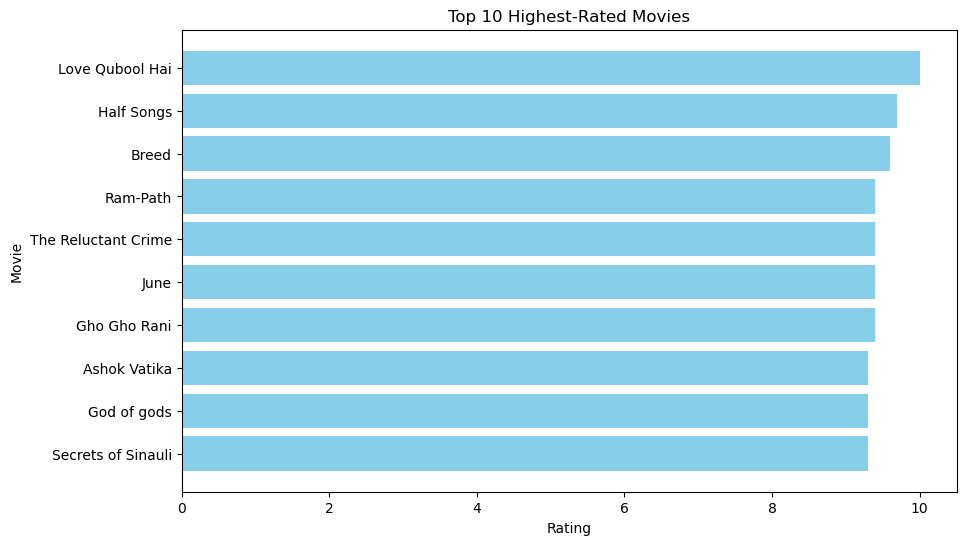

In [14]:
top_rated_movies= data.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()
plt.show

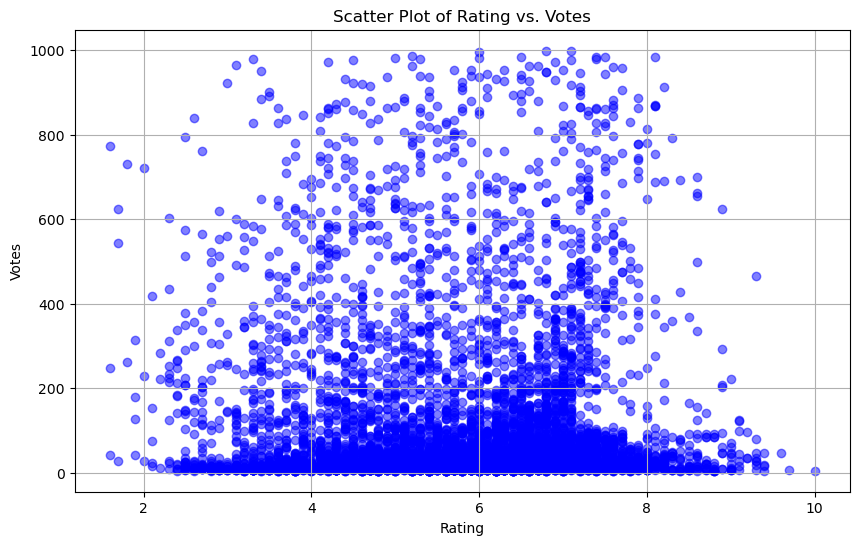

In [15]:
data['Votes']=to_numeric(data['Votes'],errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(data['Rating'], data['Votes'], alpha=0.5, color='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs. Votes')
plt.grid(True)

Text(0.5, 1.0, 'Top 10 Actors by Number of Movies Performed')

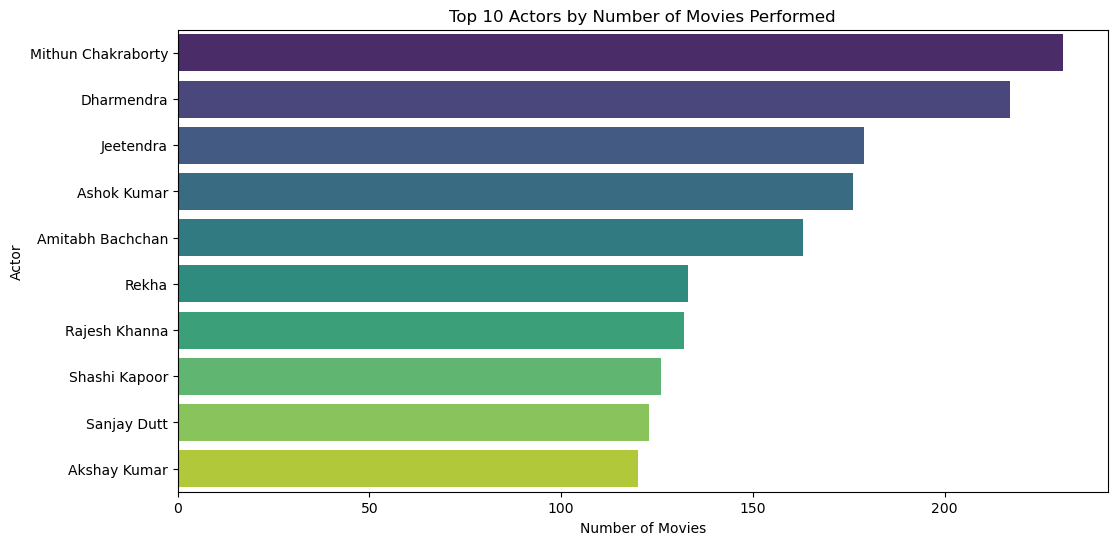

In [16]:
actors=concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
actor_counts= actors.value_counts().reset_index()
actor_counts.columns= ['Actor', 'Number of Movies']
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Movies', y='Actor', data= actor_counts.head(10), palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')

Text(0.5, 1.0, 'Correlation Heatmap')

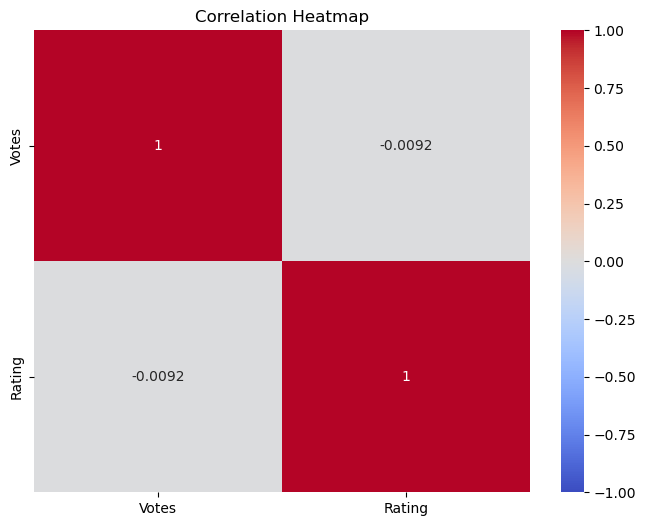

In [17]:
numerical_columns = ['Votes', 'Rating', 'Year']
correlation_matrix= data[numerical_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

Text(0.5, 1.02, 'Pair Plot of Voting, Rating and Year')

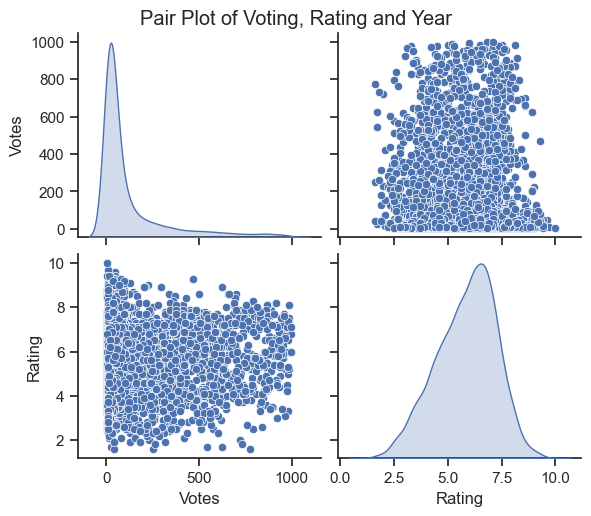

In [18]:
columns_of_interest= ['Votes', 'Rating', 'Year']
sns.set(style='ticks')
sns.pairplot(data[columns_of_interest], diag_kind='kde', markers='o', palette='viridis',height=2.5,aspect=1.2)
plt.suptitle('Pair Plot of Voting, Rating and Year',y=1.02)

Sorting data

In [19]:
data_sort=data.sort_values(by='Votes',ascending=False)
data_sort['Vote_Count_percentile']=data_sort['Votes'].rank(pct=True)*100
data_sort.reset_index(drop=True,inplace=True)
print(data_sort[['Name','Votes','Vote_Count_percentile']])

                                      Name  Votes  Vote_Count_percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.984728
2                              Kurukshetra  996.0              99.969456
3                              Dishkiyaoon  986.0              99.954184
4                               Kadvi Hawa  985.0              99.931277
...                                    ...    ...                    ...
7914                                 Ziddi    NaN                    NaN
7915                        Zila Ghaziabad    NaN                    NaN
7916                                 Zinda    NaN                    NaN
7917              Zindagi Na Milegi Dobara    NaN                    NaN
7918                              Zubeidaa    NaN                    NaN

[7919 rows x 3 columns]


In [20]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [21]:
data=data.dropna(subset=['Votes'])
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


Model Training and Testing 

In [22]:
data['Year']=data['Year'].astype(str)
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)
X= data[['Year', 'Votes']]
Y=data['Rating']
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,Y_train)

LinearRegression()

In [25]:
Y_predict=model.predict(X_test)

In [26]:
mn=mean_absolute_error(Y_test, Y_predict)
mnse=mean_squared_error(Y_test,Y_predict, squared=False)
r2=r2_score(Y_test,Y_predict)
print(f"Mean Absolute Error:{mn}")
print(f"Root Mean Squared Error:{mnse}")
print(f"R-squared (R2) Score:{r2}")

Mean Absolute Error:1.0545648059308117
Root Mean Squared Error:1.3262364088176959
R-squared (R2) Score:0.04348341408110723


Prediction in Visualization for Better Understanding

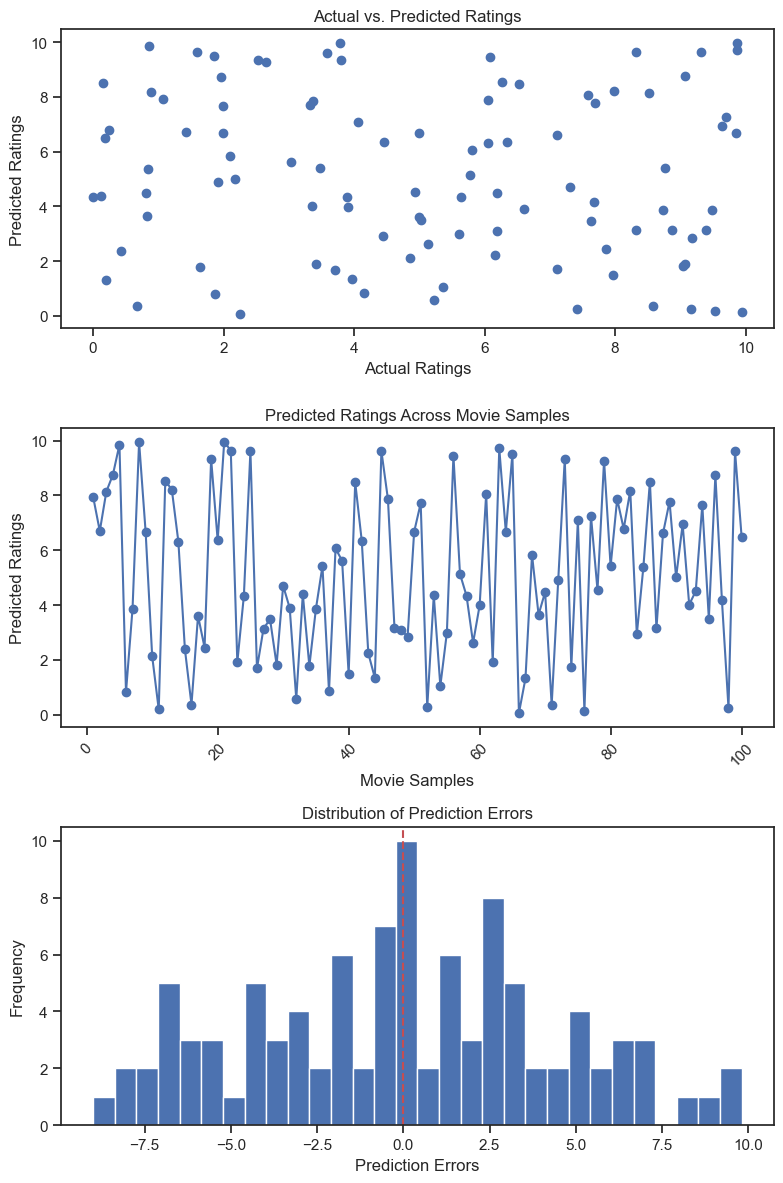

In [27]:
y_test = np.random.rand(100) * 10 # Actual ratings 
y_pred = np.random.rand(100) * 10 # Predicted ratings
errors = y_test - y_pred
fig, axs = plt.subplots(3, 1, figsize =(8, 12)) 

axs[0].scatter (y_test, y_pred) 
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs. Predicted Ratings")

# Line plot
movie_samples = np.arange(1, len (y_pred) + 1) 
axs [1].plot (movie_samples, y_pred, marker = 'o', linestyle = '-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params (axis = 'x', rotation = 45)

# Histogram
axs[2].hist (errors, bins = 30)
axs [2].set_xlabel("Prediction Errors")
axs [2].set_ylabel("Frequency")
axs [2].set_title("Distribution of Prediction Errors")
axs [2].axvline(x = 0, color = 'r', linestyle = '--')

plt.tight_layout()

plt.show()
